# Payment Date Prediction 


### Importing related Libraries 

In [1]:
#importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing matplotlib for eda
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn
import seaborn as sns


### Store the dataset into the Dataframe


In [2]:
#reading the dataset
df=pd.read_csv("dataset.csv")
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Check the shape of the dataframe


In [3]:
df.shape

(50099, 19)

### Check the Detail information of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50099 entries, 0 to 50098
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50099 non-null  object 
 1   cust_number             50099 non-null  object 
 2   name_customer           50099 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50099 non-null  int64  
 5   doc_id                  50099 non-null  int64  
 6   posting_date            50099 non-null  object 
 7   document_create_date    50099 non-null  int64  
 8   document_create_date.1  50099 non-null  int64  
 9   due_in_date             50099 non-null  int64  
 10  invoice_currency        50099 non-null  object 
 11  document type           50099 non-null  object 
 12  posting_id              50099 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50099 non-null

### Display All the column names

In [5]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50099.000000,5.009900e+04,5.009900e+04,5.009900e+04,5.009900e+04,50099.0,0.0,50099.000000,5.009900e+04,5.009300e+04,50099.000000
mean,2019.307072,2.014112e+09,2.019353e+07,2.019355e+07,2.019369e+07,1.0,NaN,32456.565546,2.019355e+07,2.013216e+09,0.201581
std,0.461284,2.912992e+08,4.501712e+03,4.487779e+03,4.475909e+03,0.0,NaN,39259.249400,4.488339e+03,2.795573e+08,0.401185
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929343e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4943.480000,2.019051e+07,1.929343e+09,0.000000
50%,2019.000000,1.929968e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17700.000000,2.019091e+07,1.929968e+09,0.000000
75%,2020.000000,1.930621e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47385.590000,2.020013e+07,1.930621e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [8]:
df.isnull().mean() * 100

business_code               0.000000
cust_number                 0.000000
name_customer               0.000000
clear_date                 20.158087
buisness_year               0.000000
doc_id                      0.000000
posting_date                0.000000
document_create_date        0.000000
document_create_date.1      0.000000
due_in_date                 0.000000
invoice_currency            0.000000
document type               0.000000
posting_id                  0.000000
area_business             100.000000
total_open_amount           0.000000
baseline_create_date        0.000000
cust_payment_terms          0.000000
invoice_id                  0.011976
isOpen                      0.000000
dtype: float64

### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
df.loc[:,['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
50094,2.960619e+09,2960618884
50095,2.960619e+09,2960618885
50096,2.960619e+09,2960618886
50097,2.960619e+09,2960618887


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
def findDuplicateColumns(df):
    duplicatecolumns=set()
    for x in range(df.shape[1]):
        col1=df.iloc[:,x]
        for y in range(x+1,df.shape[1]):
            col2=df.iloc[:,y]
            if col1.equals(col2):
                duplicatecolumns.add(df.columns.values[y])
    return list(duplicatecolumns)

In [11]:
dr=findDuplicateColumns(df)
dr


[]

#### Please check, Column 'posting_id' is constant columns or not


In [12]:
df['posting_id'].notna()

0        True
1        True
2        True
3        True
4        True
         ... 
50094    True
50095    True
50096    True
50097    True
50098    True
Name: posting_id, Length: 50099, dtype: bool

In [13]:
#from above we can see that posting_id have values and it does not have null values

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [14]:
df["isOpen"].nunique()

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [15]:
df1=df.copy()


In [16]:
df.drop(['isOpen','document type','document_create_date.1',"document_create_date",'area_business',"posting_id","invoice_id"],inplace=True, axis=1)

### Please check from the dataframe whether all the columns are removed or not 

In [17]:
df.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200210,USD,54273.28,20200126,NAH4
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190811,USD,79656.60,20190722,NAD1
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190929,USD,2253.86,20190914,NAA8
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200410,CAD,3299.70,20200331,CA10
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191128,USD,33133.29,20191113,NAH4


### Show all the Duplicate rows from the dataframe

In [18]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49963,U001,200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,10968.24,20190113,NAH4
49986,U001,200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,155837.53,20190529,NAU5
49990,U001,200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,4008.05,20190522,NAA8
49991,U001,200704045,RA trust,25-10-2019 00:00,2019,1930001131,10-10-2019,20191025,USD,73002.24,20191010,NAA8


### Display the Number of Duplicate Rows

In [19]:
df.duplicated().value_counts()
#the true value have alot same values

False    48937
True      1162
dtype: int64

### Drop all the Duplicate Rows

In [20]:
df.drop_duplicates(keep = False, inplace = True)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [21]:
df.duplicated().value_counts()
#now we can see duplicate value (true) not there below

False    47789
dtype: int64

### Check for the number of Rows and Columns in your dataset

In [22]:
rows = len(df.axes[0])
rows
#these are the number of rows in our dataset


47789

In [23]:
cols = len(df.axes[1])
cols
#these are the number of columns in our dataset

12

### Find out the total count of null values in each columns

In [24]:
 df.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9464
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [25]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [26]:
#this represent all datatype of the columns if 0-object ,float64-float,int64-integer
df["clear_date"].dtypes

dtype('O')

In [27]:
df["posting_date"].dtypes

dtype('O')

In [28]:
df["due_in_date"].dtypes

dtype('int64')

In [29]:
df["baseline_create_date"].dtypes

dtype('int64')

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [30]:
#convert clear_dates to date time
df['clear_date']=pd.to_datetime(df['clear_date'])
df['clear_date'].head()

0   2020-11-02
1   2019-08-08
2   2019-12-30
3          NaT
4   2019-11-25
Name: clear_date, dtype: datetime64[ns]

In [31]:
#convert due_in_dates to date time
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['due_in_date'].head()

0   2020-02-10
1   2019-08-11
2   2019-09-29
3   2020-04-10
4   2019-11-28
Name: due_in_date, dtype: datetime64[ns]

In [32]:
#convert posting_dates to date time
df['posting_date']=pd.to_datetime(df['posting_date'])
df['posting_date'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-30
4   2019-11-13
Name: posting_date, dtype: datetime64[ns]

In [33]:
#convert baseline_create_dates to date time
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['baseline_create_date'].head()

0   2020-01-26
1   2019-07-22
2   2019-09-14
3   2020-03-31
4   2019-11-13
Name: baseline_create_date, dtype: datetime64[ns]

### Please check the datatype of all the columns after conversion of the above 4 columns

In [34]:
df.dtypes
#now we can see all the column which we changed are now having datetime 64 which got converted

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                    int64
doc_id                           int64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [35]:
#this is the count of the currency
df['invoice_currency'].value_counts()

USD    43953
CAD     3836
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [36]:
df['total_open_amount'].value_counts()

1897.50     99
92832.27    98
471.56      95
1898.20     92
943.12      60
            ..
6267.00      1
13445.49     1
81305.21     1
24966.50     1
20787.26     1
Name: total_open_amount, Length: 43352, dtype: int64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [37]:
#convert the total_amount of the data which are having currency as canadian dollar to US dollar
df['converted_usd'] = np.where(df['invoice_currency'] == 'CAD',df['total_open_amount'] * 0.7,df['total_open_amount'])
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,54273.28
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,79656.60
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,2253.86
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10,2309.79
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,33133.29


### Display the new "converted_usd" column values

In [38]:
df['converted_usd'].head(4)

0    54273.28
1    79656.60
2     2253.86
3     2309.79
Name: converted_usd, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [39]:
#so we grouped buisness_year to find how many records of year available in the dataset
df.groupby("buisness_year").buisness_year.value_counts()

buisness_year  buisness_year
2019           2019             33242
2020           2020             14547
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [40]:
df.drop(['invoice_currency','total_open_amount'],inplace=True, axis=1)

### Write a code to check the number of columns in dataframe

In [41]:
df.shape

(47789, 11)

In [42]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
...,...,...,...,...,...,...,...,...,...,...,...
50094,CA02,140106408,WAL-M corp,NaT,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50095,CA02,140106408,WAL-M corp,NaT,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50096,CA02,140106408,WAL-M corp,NaT,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50097,CA02,140106408,WAL-M corp,NaT,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589


# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [43]:
#we have 2 columns having null values
df.isna().any()

business_code           False
cust_number             False
name_customer           False
clear_date               True
buisness_year           False
doc_id                  False
posting_date            False
due_in_date             False
baseline_create_date    False
cust_payment_terms      False
converted_usd           False
dtype: bool

#### Find out the number of null values from the column that you got from the above code

In [44]:
#overall column having null value is 2
df.isna().any().value_counts() 

False    10
True      1
dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [45]:
maindata=df[df.clear_date.isnull()==False]
nulldata=df[df.clear_date.isnull()]

### Check the number of Rows and Columns for both the dataframes 

In [46]:
maindata.shape

(38325, 11)

In [47]:
nulldata.shape

(9464, 11)

### Display the 5 records from maindata and nulldata dataframes

In [48]:
maindata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [49]:
nulldata.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [50]:
maindata['Delay']=maindata['clear_date']-maindata['due_in_date']
maindata

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2628269724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['Delay']=maindata['clear_date']-maindata['due_in_date']


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,84780.400,0 days
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-174 days
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,59 days
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [51]:
avgdelay = maindata.groupby('name_customer')['Delay'].mean()

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [52]:
maindata['avg_delay']=maindata['name_customer'].map(avgdelay)
maindata.head()

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/1792488133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['avg_delay']=maindata['name_customer'].map(avgdelay)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days,2 days 21:47:04.615384615
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,25 days 00:00:00
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,29 days 19:12:00
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,4 days 09:56:54.022140221
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days,48 days 06:51:25.714285714


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [53]:
maindata['avg_delay']=maindata['avg_delay'].dt.days*86400

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2942952781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata['avg_delay']=maindata['avg_delay'].dt.days*86400


### Display the maindata dataframe 

In [54]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days,172800
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,2160000
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,2505600
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,345600
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days,4147200


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [55]:
maindata.drop(['Delay','clear_date'],axis=1,inplace=True)

C:\Users\vichu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
maindata.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,172800
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,2160000
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,2505600
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,345600
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,4147200


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [57]:
#this is the x value which we got from the train_data above
X=maindata.iloc[:,:-1]

In [58]:
X

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,84780.400
49996,U001,200769623,WAL-MAR co,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540
49997,U001,200772595,SAFEW associates,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860
49998,U001,200726979,BJ'S llc,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480


In [59]:
#y contains delay value
y = maindata['avg_delay']
y

0         172800
1        2160000
2        2505600
4         345600
5        4147200
          ...   
49994    -864000
49996    -172800
49997     172800
49998    1468800
49999    -777600
Name: avg_delay, Length: 38325, dtype: int64

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [60]:
from sklearn.model_selection import train_test_split

X_train,X_loc_test,y_train,y_loc_test = train_test_split(X,y,test_size=0.4,train_size=0.6,random_state=0,shuffle = False)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [61]:
X_train.shape

(22995, 10)

In [62]:
X_loc_test.shape

(15330, 10)

In [63]:
y_train.shape

(22995,)

In [64]:
y_loc_test.shape

(15330,)

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [65]:
X_val,X_test,y_val,y_test = train_test_split(X_loc_test,y_loc_test,test_size=0.5,train_size=0.5, random_state=0,shuffle = False)

### Please check for the number of rows and columns of all the 4 dataframes 

In [66]:
X_val.shape

(7665, 10)

In [67]:
X_test.shape

(7665, 10)

In [68]:
y_val.shape

(7665,)

In [69]:
y_test.shape

(7665,)

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

C:\Users\vichu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_delay'>

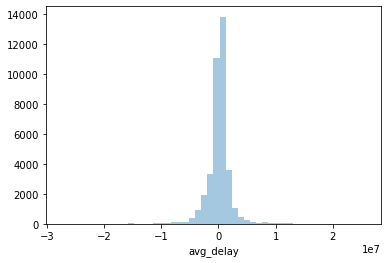

In [70]:
sns.distplot(maindata['avg_delay'], kde=False)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [71]:
 X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

,name_customer,doc_id
0,11078 us,1
1,17135 associates,1
2,236008 associates,1
3,99 CE,2
4,99 CE associates,1
...,...,...
3054,YAEGER in,1
3055,YEN BROS,1
3056,YEN BROS corporation,1
3057,YEN BROS llc,1


### You can make another distribution plot of the "doc_id" column from x_train

C:\Users\vichu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='doc_id'>

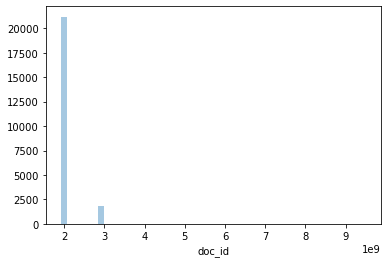

In [72]:
sns.distplot(X_train["doc_id"],kde=False)

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


C:\Users\vichu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\vichu\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


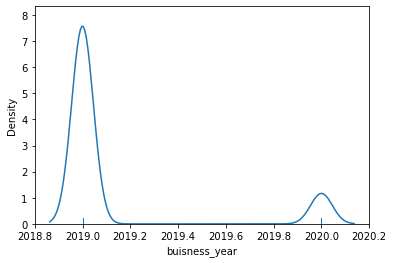

In [73]:
#a seperate distribution plot for "business_year"
ax = sns.distplot(X_train["buisness_year"], rug=True,hist=False)

C:\Users\vichu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

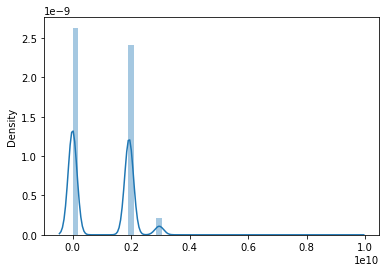

In [74]:
#distribution plot of "business_year" column along with the doc_id" 
sns.distplot(X_test[['buisness_year','doc_id']])

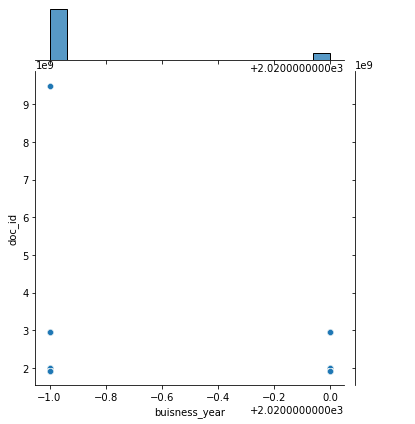

In [75]:
sns.jointplot(x ='buisness_year', y ='doc_id', data = X_train)

C:\Users\vichu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='business_code', ylabel='count'>

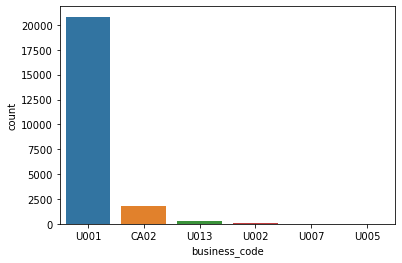

In [76]:
#from this graph this can be inferred that most of the payment were done from U001 company code
sns.countplot(X_train['business_code'])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [77]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088
...,...,...,...,...,...,...,...,...,...,...
29913,U001,200778870,C trust,2019,1928581672,2019-08-01,2019-01-23,2019-01-08,NAA8,2125.560
29914,U001,200769623,WAL-MAR llc,2019,1928726971,2019-03-02,2019-02-18,2019-02-03,NAH4,16157.020
29915,U001,200780383,MEIJ corp,2020,1930400908,2020-01-14,2020-01-29,2020-01-14,NAA8,54781.230
29916,U001,200769623,WAL-MAR co,2019,1929349275,2019-05-21,2019-06-05,2019-05-21,NAH4,11468.170


In [78]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,22995.000000,2.299500e+04,22995.000000
mean,2019.133464,2.012310e+09,30739.215490
std,0.340083,2.859707e+08,36649.302466
min,2019.000000,1.928502e+09,2.400000
25%,2019.000000,1.929181e+09,4591.578500
50%,2019.000000,1.929733e+09,16935.860000
75%,2019.000000,1.930210e+09,45541.185000
max,2020.000000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [79]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [80]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2646772204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])


In [81]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/4097299337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/4097299337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])


### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [82]:
X_train.loc[:,["business_code","business_code_enc"]]

,business_code,business_code_enc
0,U001,1
1,U001,1
2,U001,1
4,U001,1
5,CA02,0
...,...,...
29913,U001,1
29914,U001,1
29915,U001,1
29916,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [83]:
def columnsdrop(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [84]:
X_train ,X_val, X_test = columnsdrop(['business_code'])

C:\Users\vichu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [85]:
#just did an test on weather the business column removed i displayed x_train coz if it is removed in x_train then the code executed 
X_train

,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,business_code_enc
0,200769623,WAL-MAR corp,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1
1,200980828,BEN E,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,1
2,200792734,MDV/ trust,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,1
4,200769623,WAL-MAR foundation,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,1
5,140106181,THE corporation,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,0
...,...,...,...,...,...,...,...,...,...,...
29913,200778870,C trust,2019,1928581672,2019-08-01,2019-01-23,2019-01-08,NAA8,2125.560,1
29914,200769623,WAL-MAR llc,2019,1928726971,2019-03-02,2019-02-18,2019-02-03,NAH4,16157.020,1
29915,200780383,MEIJ corp,2020,1930400908,2020-01-14,2020-01-29,2020-01-14,NAA8,54781.230,1
29916,200769623,WAL-MAR co,2019,1929349275,2019-05-21,2019-06-05,2019-05-21,NAH4,11468.170,1


### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [86]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2301419458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2301419458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
C:\Users\vichu\AppData\Local\T

#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [87]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [88]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/1721247874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/1721247874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/1721247874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [89]:
X_train ,X_val, X_test = columnsdrop(['name_customer'])

C:\Users\vichu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [90]:
#checking wheather the column removed
X_train

,cust_number,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,business_code_enc,name_customer_enc
0,200769623,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1,2957
1,200980828,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,1,289
2,200792734,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,1,1828
4,200769623,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,1,2959
5,140106181,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,0,2783
...,...,...,...,...,...,...,...,...,...,...
29913,200778870,2019,1928581672,2019-08-01,2019-01-23,2019-01-08,NAA8,2125.560,1,418
29914,200769623,2019,1928726971,2019-03-02,2019-02-18,2019-02-03,NAH4,16157.020,1,2961
29915,200780383,2020,1930400908,2020-01-14,2020-01-29,2020-01-14,NAA8,54781.230,1,1833
29916,200769623,2019,1929349275,2019-05-21,2019-06-05,2019-05-21,NAH4,11468.170,1,2956


### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [91]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/1215482524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/1215482524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/1215482524.py:5: SettingWithCopyWarning: 
A value is trying 

In [92]:
X_train ,X_val, X_test = columnsdrop(['cust_payment_terms'])

C:\Users\vichu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [93]:
#checking
X_val

,cust_number,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc
29920,200726979,2019,1929655233,2019-07-25,2019-08-09,2019-07-25,15549.01,1,324,20
29923,200764795,2020,1930337037,2019-12-31,2020-02-01,2019-12-31,26731.82,1,2699,13
29924,200769623,2019,1929405104,2019-05-31,2019-06-15,2019-05-31,15473.30,1,2960,32
29925,200820380,2019,1929575869,2019-05-07,2019-07-20,2019-07-05,18129.15,1,2512,20
29927,200754278,2019,1928760903,2019-07-02,2019-02-22,2019-02-07,23720.53,1,1779,20
...,...,...,...,...,...,...,...,...,...,...
39915,200790107,2019,1928571277,2019-05-01,2019-01-20,2019-01-05,45121.64,1,2341,25
39916,200769623,2020,1930470430,2020-04-02,2020-02-19,2020-02-04,661.11,1,2961,32
39917,200337148,2019,1929272915,2019-06-05,2019-05-21,2019-05-06,121065.40,1,549,20
39918,200780825,2020,1930544137,2020-02-20,2020-03-06,2020-02-20,14854.82,1,2724,20


## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [94]:
X_train.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [95]:
X_val.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [96]:
X_test.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [97]:

X_train['day_of_postingdate'] = X_train['posting_date']. dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] =X_test['posting_date'].dt.year



C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/350373267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['day_of_postingdate'] = X_train['posting_date']. dt.day
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/350373267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/350373267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [98]:
X_train ,X_val, X_test = columnsdrop(['posting_date'])

C:\Users\vichu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [99]:
#Check
X_train.head(6)

,cust_number,buisness_year,doc_id,due_in_date,baseline_create_date,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate
0,200769623,2020,1930438491,2020-02-10,2020-01-26,54273.280,1,2957,32,26,1,2020
1,200980828,2019,1929646410,2019-08-11,2019-07-22,79656.600,1,289,27,22,7,2019
2,200792734,2019,1929873765,2019-09-29,2019-09-14,2253.860,1,1828,20,14,9,2019
4,200769623,2019,1930147974,2019-11-28,2019-11-13,33133.290,1,2959,32,13,11,2019
5,140106181,2019,2960581231,2019-10-04,2019-09-24,15558.088,0,2783,5,20,9,2019
6,200769623,2019,1930083373,2019-11-16,2019-11-01,7358.490,1,2960,32,11,1,2019


### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [100]:
X_train['day_of_createdate'] = X_train['baseline_create_date']. dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year


C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2142400472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['day_of_createdate'] = X_train['baseline_create_date']. dt.day
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2142400472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2142400472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [101]:
X_train ,X_val, X_test = columnsdrop(["baseline_create_date"])

C:\Users\vichu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [102]:
X_train.head(5)

,cust_number,buisness_year,doc_id,due_in_date,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate
0,200769623,2020,1930438491,2020-02-10,54273.280,1,2957,32,26,1,2020,26,1,2020
1,200980828,2019,1929646410,2019-08-11,79656.600,1,289,27,22,7,2019,22,7,2019
2,200792734,2019,1929873765,2019-09-29,2253.860,1,1828,20,14,9,2019,14,9,2019
4,200769623,2019,1930147974,2019-11-28,33133.290,1,2959,32,13,11,2019,13,11,2019
5,140106181,2019,2960581231,2019-10-04,15558.088,0,2783,5,20,9,2019,24,9,2019


### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [103]:
X_train['day_of_due'] = X_train['due_in_date']. dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/1835454101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['day_of_due'] = X_train['due_in_date']. dt.day
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/1835454101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['month_of_due'] = X_train['due_in_date'].dt.month
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/1835454101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [104]:
X_train ,X_val, X_test = columnsdrop(["due_in_date"])

C:\Users\vichu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [105]:
X_train.dtypes

cust_number                 int32
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [106]:
X_val.dtypes

cust_number                 int32
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [107]:
X_test.dtypes

cust_number                 int32
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [108]:
#varience library called varianceThrshold from sklearn
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [109]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [110]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [111]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [112]:
train=X_train.copy()
handling_correlation(train.copy(),threshold=0.85)

['year_of_postingdate',
 'month_of_due',
 'year_of_createdate',
 'year_of_due',
 'day_of_createdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

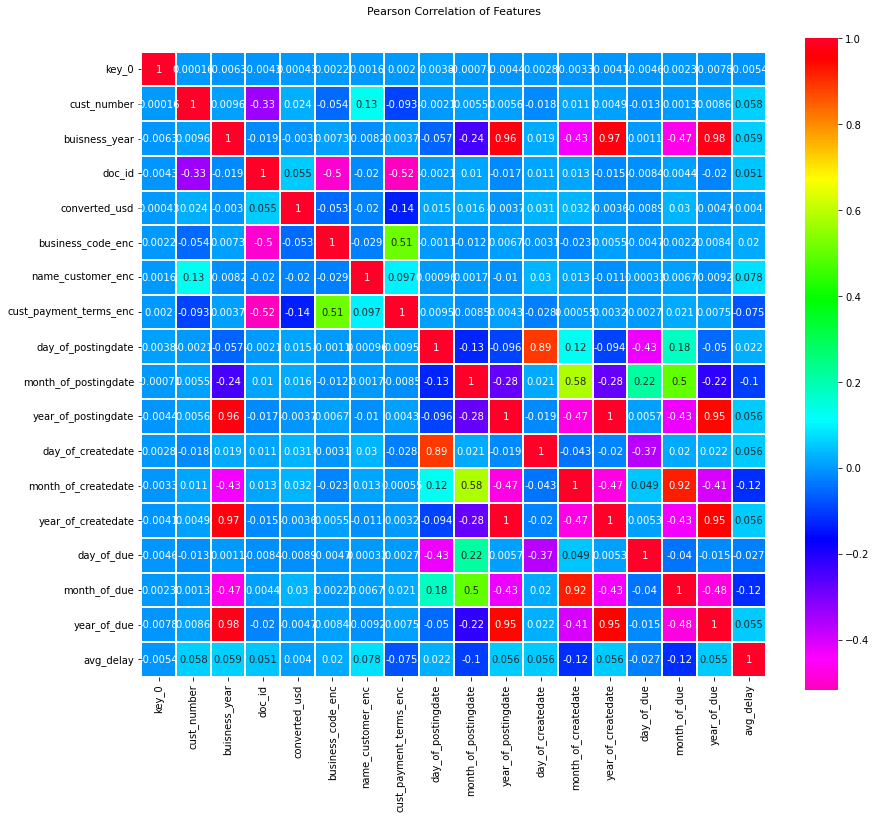

In [113]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=11)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [114]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [115]:
sel.variances_

array([1.80240952e+15, 1.15651212e-01, 8.17756859e+16, 1.34311296e+09,
       2.89474211e-01, 1.05085629e+06, 1.17076153e+02, 8.15150274e+01,
       1.18979653e+01, 1.16255512e-01, 7.71857079e+01, 1.22909844e+01,
       1.16385860e-01, 7.61082670e+01, 1.20601303e+01, 1.19081190e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [116]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [117]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [118]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [119]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2449602.803093652

In [120]:
r2_score(y_test, predict_test)

-0.05625914000220522

### Display The Comparison Lists

In [121]:
for i in Algorithm, MSE_Score, R2_Score: 
    print(i,end=',')

['LinearRegression'],[5731219842135.234],[0.04515555089543888],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [122]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegression')
regressor_svr = SVR()
regressor_svr.fit(X_train, y_train)
predicted_svr = regressor_svr.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [123]:

MSE_Score.append(mean_squared_error(y_test, predicted_svr))
R2_Score.append(r2_score(y_test, predicted_svr))


### Check the same for the Validation set also 

In [124]:
predict_test1= regressor_svr.predict(X_val)
mean_squared_error(y_val, predict_test1, squared=False)
r2_score(y_val, predict_test1)

-0.00226008978126635

### Display The Comparison Lists

In [125]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression'],[5731219842135.234, 6029115187979.354],[0.04515555089543888, -0.004475020820227105],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [126]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegression')

DecisionTreeRegressor = DecisionTreeRegressor()
DecisionTreeRegressor.fit(X_train, y_train)
predicted_randTrees = DecisionTreeRegressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [127]:
MSE_Score.append(mean_squared_error(y_test, predicted_randTrees))
R2_Score.append(r2_score(y_test, predicted_randTrees))


### Check the same for the Validation set also 

In [128]:
predict_test2= DecisionTreeRegressor.predict(X_val)
mean_squared_error(y_val, predict_test2, squared=False)
r2_score(y_val, predict_test2)

-0.6796408775031932

### Display The Comparison Lists

In [129]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegression'],[5731219842135.234, 6029115187979.354, 10011742372320.94],[0.04515555089543888, -0.004475020820227105, -0.6679968476857479],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [130]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForest')

regressor_randTree = RandomForestRegressor()
regressor_randTree.fit(X_train, y_train)
predicted_randTree = regressor_randTree.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [131]:
MSE_Score.append(mean_squared_error(y_test, predicted_randTree))
R2_Score.append(r2_score(y_test, predicted_randTree))


In [132]:
predict_test3= regressor_randTree.predict(X_val)
mean_squared_error(y_val, predict_test3, squared=False)


2308385.9841497336

### Check the same for the Validation set also 

In [133]:
r2_score(y_val, predicted)

-0.050508499846555255

### Display The Comparison Lists


In [134]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegression', 'RandomForest'],[5731219842135.234, 6029115187979.354, 10011742372320.94, 4956867670401.553],[0.04515555089543888, -0.004475020820227105, -0.6679968476857479, 0.17416576044909993],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [135]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressors = xgb.XGBRegressor()
regressors.fit(X_train, y_train)
predicted = regressors.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [136]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [137]:
predict_test3= regressors.predict(X_val)
mean_squared_error(y_val, predict_test3, squared=False)

2231223.149832173

In [138]:
r2_score(y_val, predict_test3)

0.1997167136581427

### Display The Comparison Lists


In [139]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegression', 'DecisionTreeRegression', 'RandomForest', 'XGB Regressor'],[5731219842135.234, 6029115187979.354, 10011742372320.94, 4956867670401.553, 4891136382349.59],[0.04515555089543888, -0.004475020820227105, -0.6679968476857479, 0.17416576044909993, 0.185116859387494],

## You need to make the comparison list into a comparison dataframe 

In [140]:
comp_list =pd.DataFrame({"Algorithm":Algorithm, "MSE_Score":MSE_Score, "R2_Score":R2_Score})
comp_list

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,5.731220e+12,0.045156
1,SupportVectorRegression,6.029115e+12,-0.004475
2,DecisionTreeRegression,1.001174e+13,-0.667997
3,RandomForest,4.956868e+12,0.174166
4,XGB Regressor,4.891136e+12,0.185117


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [141]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

In [142]:
import pickle 
# save the model to disk
with open('model.sav','wb') as file:
    pickle.dump(regressorfinal,file)
 
# load the model from disk
with open('model.sav','rb') as file:
    mp = pickle.load(file)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [143]:
mean_squared_error(y_test,predictedfinal,squared=False)

2211591.3687545424

### Calculate the mean Square Error for validation dataset

In [144]:
predict_test4= regressorfinal.predict(X_val)
mean_squared_error(y_val, predict_test4, squared=False)

2231223.149832173

### Calculate the R2 score for test

In [145]:
r2_score(y_test, predict_testfinal)

-0.3368077141874737

### Calculate the R2 score for Validation

In [146]:
r2_score(y_val, predict_testfinal)

0.1997167136581427

### Calculate the Accuracy for train Dataset 

In [147]:
print("Accuracy= ", regressorfinal.score(X_train,y_train))

Accuracy=  0.6766784093311484


### Calculate the accuracy for validation

In [148]:
print("Accuracy= ", regressorfinal.score(X_val,y_val))

Accuracy=  0.1997167136581427


### Calculate the accuracy for test

In [149]:
print("Accuracy= ", regressorfinal.score(X_test,y_test))

Accuracy=  0.185116859387494


## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

i am choosing  XGBoost Regressor coz from the comp_data ,i am getting mse score low and R2_Score high compared to other model and getting best accuracy

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [150]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060
...,...,...,...,...,...,...,...,...,...,...,...
50094,CA02,140106408,WAL-M corp,NaT,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50095,CA02,140106408,WAL-M corp,NaT,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50096,CA02,140106408,WAL-M corp,NaT,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50097,CA02,140106408,WAL-M corp,NaT,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589


### Check for the number of rows and columns in the nulldata

In [151]:
nulldata.shape

(9464, 11)

### Check the Description and Information of the nulldata 

In [152]:
nulldata.describe() 

,buisness_year,doc_id,converted_usd
count,9464.0,9.464000e+03,9464.000000
mean,2020.0,2.014942e+09,32375.615590
std,0.0,2.813097e+08,35367.557011
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930660e+09,5758.240000
50%,2020.0,1.930732e+09,19429.170000
75%,2020.0,1.930820e+09,48778.890000
max,2020.0,2.960636e+09,653644.800000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [153]:
nulldata1=nulldata.copy(deep=True)
nulldata1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060
...,...,...,...,...,...,...,...,...,...,...,...
50094,CA02,140106408,WAL-M corp,NaT,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50095,CA02,140106408,WAL-M corp,NaT,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50096,CA02,140106408,WAL-M corp,NaT,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50097,CA02,140106408,WAL-M corp,NaT,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [154]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2833002236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])


### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [155]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/1346024529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [156]:
#converting date columns into date time formats
nulldata['clear_date']=pd.to_datetime(nulldata['clear_date'])
nulldata['due_in_date']=pd.to_datetime(nulldata['due_in_date'],format='%Y%m%d')
nulldata['posting_date']=pd.to_datetime(nulldata['posting_date'])
nulldata['baseline_create_date']=pd.to_datetime(nulldata['baseline_create_date'],format='%Y%m%d')
nulldata.head()

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/45390177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['clear_date']=pd.to_datetime(nulldata['clear_date'])
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/45390177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['due_in_date']=pd.to_datetime(nulldata['due_in_date'],format='%Y%m%d')
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/45390177.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,business_code_enc
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,0
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,1
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59,1
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,1
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,1


In [157]:
nulldata['day_of_cleardate'] =nulldata['clear_date']. dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_due'] =nulldata['due_in_date']. dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date']. dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date']. dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/3121942459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['day_of_cleardate'] =nulldata['clear_date']. dt.day
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/3121942459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/3121942459.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [158]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,...,year_of_cleardate,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,day_of_postingdate,month_of_postingdate,year_of_postingdate
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,...,NaN,10,4,2020,31,3,2020,30,3,2020
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,...,NaN,3,4,2020,19,3,2020,19,3,2020
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,...,NaN,26,3,2020,11,3,2020,3,11,2020
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,...,NaN,30,4,2020,15,4,2020,15,4,2020
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,...,NaN,26,4,2020,16,4,2020,23,4,2020


### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [159]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2042587076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2042587076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
C:\Users\vichu\AppData\Local\Temp/ipykernel_23284/2042587076.py:3: SettingWithCopyWarning: 
A value is trying to

### Check for the datatypes of all the columns of Nulldata

In [160]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [161]:
nulldata.drop(["clear_date","cust_payment_terms",'day_of_cleardate',"month_of_cleardate","year_of_cleardate",'business_code',"due_in_date","posting_date","name_customer"],inplace=True, axis=1)

C:\Users\vichu\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Check the information of the "nulldata" dataframe

In [162]:
nulldata

,cust_number,buisness_year,doc_id,baseline_create_date,converted_usd,business_code_enc,day_of_due,month_of_due,year_of_due,day_of_createdate,month_of_createdate,year_of_createdate,day_of_postingdate,month_of_postingdate,year_of_postingdate,cust_payment_terms_enc,name_customer_enc
3,140105686,2020,2960623488,2020-03-31,2309.790,64,10,4,2020,31,3,2020,30,3,2020,5,2687
7,200744019,2020,1930659387,2020-03-19,11173.020,64,3,4,2020,19,3,2020,19,3,2020,20,2770
10,200418007,2020,1930610806,2020-03-11,3525.590,64,26,3,2020,11,3,2020,3,11,2020,20,91
14,200739534,2020,1930788296,2020-04-15,121105.650,64,30,4,2020,15,4,2020,15,4,2020,20,2004
15,200353024,2020,1930817482,2020-04-16,3726.060,64,26,4,2020,16,4,2020,23,4,2020,34,713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50094,140106408,2020,2960618884,2020-03-06,64982.589,64,16,3,2020,6,3,2020,3,6,2020,5,2946
50095,140106408,2020,2960618885,2020-03-06,64982.589,64,16,3,2020,6,3,2020,3,6,2020,5,2946
50096,140106408,2020,2960618886,2020-03-06,64982.589,64,16,3,2020,6,3,2020,3,6,2020,5,2946
50097,140106408,2020,2960618887,2020-03-06,64982.589,64,16,3,2020,6,3,2020,3,6,2020,5,2946


### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [163]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7665 entries, 39920 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7665 non-null   int32  
 1   buisness_year           7665 non-null   int64  
 2   doc_id                  7665 non-null   int64  
 3   converted_usd           7665 non-null   float64
 4   business_code_enc       7665 non-null   int32  
 5   name_customer_enc       7665 non-null   int32  
 6   cust_payment_terms_enc  7665 non-null   int32  
 7   day_of_postingdate      7665 non-null   int64  
 8   month_of_postingdate    7665 non-null   int64  
 9   year_of_postingdate     7665 non-null   int64  
 10  day_of_createdate       7665 non-null   int64  
 11  month_of_createdate     7665 non-null   int64  
 12  year_of_createdate      7665 non-null   int64  
 13  day_of_due              7665 non-null   int64  
 14  month_of_due            7665 non-nu

In [164]:
nulldata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9464 entries, 3 to 50098
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   cust_number             9464 non-null   int32         
 1   buisness_year           9464 non-null   int64         
 2   doc_id                  9464 non-null   int64         
 3   baseline_create_date    9464 non-null   datetime64[ns]
 4   converted_usd           9464 non-null   float64       
 5   business_code_enc       9464 non-null   int32         
 6   day_of_due              9464 non-null   int64         
 7   month_of_due            9464 non-null   int64         
 8   year_of_due             9464 non-null   int64         
 9   day_of_createdate       9464 non-null   int64         
 10  month_of_createdate     9464 non-null   int64         
 11  year_of_createdate      9464 non-null   int64         
 12  day_of_postingdate      9464 non-null   int64  

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [165]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [166]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'baseline_create_date',
       'converted_usd', 'business_code_enc', 'day_of_due', 'month_of_due',
       'year_of_due', 'day_of_createdate', 'month_of_createdate',
       'year_of_createdate', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [167]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [168]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020,2960623488,2309.790,64,2687,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020,1930659387,11173.020,64,2770,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020,1930610806,3525.590,64,91,20,3,11,2020,11,3,2020,26,3,2020
14,200739534,2020,1930788296,121105.650,64,2004,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020,1930817482,3726.060,64,713,34,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50094,140106408,2020,2960618884,64982.589,64,2946,5,3,6,2020,6,3,2020,16,3,2020
50095,140106408,2020,2960618885,64982.589,64,2946,5,3,6,2020,6,3,2020,16,3,2020
50096,140106408,2020,2960618886,64982.589,64,2946,5,3,6,2020,6,3,2020,16,3,2020
50097,140106408,2020,2960618887,64982.589,64,2946,5,3,6,2020,6,3,2020,16,3,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [169]:
final_result=regressors.predict(nulldata2)



### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [170]:
#final_result containing the Predicted_delay data
final_result = pd.DataFrame(final_result,columns=['avg_delay'])

### Display the "avg_delay" column

In [171]:
final_result

,avg_delay
0,7252959.500
1,3546227.750
2,3193536.000
3,-822143.625
4,3033360.500
...,...
9459,1153727.625
9460,1153727.625
9461,1153727.625
9462,1153727.625


In [172]:
nulldata2.isnull().sum()

cust_number               0
buisness_year             0
doc_id                    0
converted_usd             0
business_code_enc         0
name_customer_enc         0
cust_payment_terms_enc    0
day_of_postingdate        0
month_of_postingdate      0
year_of_postingdate       0
day_of_createdate         0
month_of_createdate       0
year_of_createdate        0
day_of_due                0
month_of_due              0
year_of_due               0
dtype: int64

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [173]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index)

### Display the "Final" dataframe 

In [174]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790,7252959.500
1,7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020,3546227.750
2,10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590,3193536.000
3,14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650,-822143.625
4,15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060,3033360.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9459,50094,CA02,140106408,WAL-M corp,NaT,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,1153727.625
9460,50095,CA02,140106408,WAL-M corp,NaT,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,1153727.625
9461,50096,CA02,140106408,WAL-M corp,NaT,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,1153727.625
9462,50097,CA02,140106408,WAL-M corp,NaT,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,1153727.625


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [175]:
Final.shape

(9464, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [176]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [177]:
Final['clear_date']=pd.to_datetime(Final['clear_date'],format='%Y%m%d')

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [178]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [179]:
Final['avg_delay']

0       83.0
1       41.0
2       36.0
3      -10.0
4       35.0
        ... 
9459    13.0
9460    13.0
9461    13.0
9462    13.0
9463    13.0
Name: avg_delay, Length: 9464, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [180]:
# here i have added an extra bin value -10 coz like to represent  that the client submitted before due date as >0 instead of null value
bins=  [-10,0,15,30,45,60,100]
labels = ['>0','0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [181]:
Final.drop(["key_0","avg_delay"],inplace=True, axis=1)

### Display the count of each categoty of new "Aging Bucket" column 

In [182]:
#in aging bucket i have converted all nan values to >0 coz it  means the client has doone the job before due date
Final["Aging Bucket"]

0       Greatar than 60
1                 31-45
2                 31-45
3                    >0
4                 31-45
             ...       
9459               0-15
9460               0-15
9461               0-15
9462               0-15
9463               0-15
Name: Aging Bucket, Length: 9464, dtype: category
Categories (6, object): ['>0' < '0-15' < '16-30' < '31-45' < '46-60' < 'Greatar than 60']

### Display your final dataset with aging buckets 

In [183]:
Final.head(15)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,140105686,SYSC llc,2020-07-02 22:42:39.500000,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,Greatar than 60
1,U001,200744019,TARG us,2020-05-14 01:03:47.750000,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,31-45
2,U001,200418007,AM,2020-05-01 23:05:36.000000,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59,31-45
3,U001,200739534,OK systems,2020-04-20 11:37:36.375000,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,>0
4,U001,200353024,DECA corporation,2020-05-31 02:36:00.500000,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,31-45
5,U001,200744019,TARG associates,2020-05-14 20:55:13.000000,2020,1930676042,2020-03-21,2020-04-05,2020-03-21,NAA8,5893.01,31-45
6,U001,200337148,COAS llc,2020-03-22 02:07:50.406250,2020,1930592246,2020-02-03,2020-03-17,2020-03-02,NAA8,11380.83,0-15
7,U001,200794332,COST associates,2020-07-01 14:15:25.500000,2020,1930731070,2020-07-04,2020-04-22,2020-04-07,NAAX,3863.93,Greatar than 60
8,U001,200794332,COST llc,2020-05-31 00:09:30.125000,2020,1930803605,2020-04-23,2020-05-08,2020-04-23,NAAX,74453.01,16-30
9,U001,200803720,DEC corp,2020-04-22 00:56:29.000000,2020,1930698352,2020-03-25,2020-04-08,2020-03-16,NAM4,138.60,0-15


### Store this dataframe into the .csv format

In [184]:
#Final.to_csv('HRC82311W_V S VISWANATH_prediction.csv')

# END OF THE PROJECT

### I have finally created an ml  model for the given  dataset with an accuracy of 95.6 for training ,75 .04 for testing and  65.64 for validation using xgb boost regression method(by: HRC82311W_V S VISWANATH)